Classification using Deep neural network

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.model_selection import train_test_split

In [421]:
def eval_metrics(y_pred,y_test):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_pred[0])):
        if y_pred[0][i]==1 and y_test[0][i]==1:
            tp+=1
        elif y_pred[0][i]==0 and y_test[0][i]==0:
            tn+=1
        elif y_pred[0][i]==0 and y_test[0][i]==1:
            fn+=1
        elif y_pred[0][i]==1 and y_test[0][i]==0:
            fp+=1
    print("True postive =",tp,end="\t")
    print("False postive =",fp,end="\t")
    print("True negative =",tn,end="\t")
    print("False negative =",fn,end="\n")
    precision=tp/(tp+fp)
    print("Precision =",precision,end="\t\t")
    recall=tp/(tp+fn)
    print("recall =",recall,end="\t\t")
    f1_score=2*(precision*recall)/(precision+recall)
    print("f1_score =",f1_score,end="\t\t")
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    print("accuracy =",accuracy)
    
    return None

In [422]:
def sigmoid(z):
    A = 1/(1+np.exp(-z))
    return A, z

In [423]:
def relu(z):
    A = np.maximum(0,z)
    return A, z

In [424]:
def params_init(layer_dims):
    params = {}
    L = len(layer_dims) 
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) 
        params['b' + str(l)] = np.zeros((layer_dims[l], 1))        
    return params

In [425]:
def activation(_A, W, b, activation):
    if activation == "sigmoid":
        Z=np.dot(W,_A) + b
        linear_cache = (_A, W, b)
        A, activation_cache = sigmoid(Z)            
    elif activation == "relu":
        Z=np.dot(W,_A) + b
        linear_cache = (_A, W, b)
        A, activation_cache = relu(Z)        
    cache = (linear_cache, activation_cache)
    return A, cache

In [426]:
def forward(X, params):
    caches = []
    A = X
    L = len(params) //2
    for l in range(1, L):
        _A = A 
        W = params['W' + str(l)]
        b = params['b' + str(l)]
        A, cache = activation(_A, W, b, activation = "relu")
        caches.append(cache)
    W = params['W' + str(L)]
    b = params['b' + str(L)]
    A_, cache = activation(A, W, b, activation = "sigmoid")
    caches.append(cache)    
    return A_, caches

In [427]:
def cost(A_, Y):
    m = Y.shape[1]
    cost1 = (-1/m) * (np.dot(Y, np.log(A_).T) + np.dot((1-Y), np.log(1-A_).T))
    cost1 = np.squeeze(cost1)
    return cost1

In [428]:
def backward(dZ, cache):
    _A, W, b = cache
    m = _A.shape[1]
    dW = (1/m) * np.dot(dZ, _A.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    d_A = np.dot(W.T, dZ)    
    return d_A, dW, db



In [429]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    return dZ

In [430]:
def sigmoid_backward(dA, cache):
    Z = cache 
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [431]:
def activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache   
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        d_A, dW, db =backward(dZ, linear_cache)        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        d_A, dW, db =backward(dZ, linear_cache)        
    return d_A, dW, db

In [432]:
def backModel(A_, Y, caches):
    grads = {}
    L = len(caches) 
    m = A_.shape[1]
    Y = Y.reshape(A_.shape) 
    dA_ = - (np.divide(Y, A_) - np.divide(1 - Y, 1 - A_))
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dA_, current_cache, activation = "sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        d_A_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = d_A_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [433]:
def update_params(p, grads, learning_rate):
    params = p.copy()
    L = len(params) //2
    for l in range(L):
        params["W" + str(l+1)] = params["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        params["b" + str(l+1)] = params["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return params

In [434]:
def Model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000):
    np.random.seed(1)
    costs = []     
    params = params_init(layer_dims)
    for i in range(0, num_iterations):
        A_, caches = forward(X, params)
        cost1 = cost(A_, Y)
        grads = backModel(A_, Y, caches)
        params = update_params(params, grads, learning_rate)  
        if i == (num_iterations-1):
            print(cost1,end="\t")
        if i % 400 == 0 or i == num_iterations:
            costs.append(cost1)
    return params, costs

In [435]:
df=pd.read_csv("Ls.csv")
X=df.loc[:,df.columns!='label'].values[:,:]
y=np.array(df["label"])
print(X.shape)
print(y.shape)

(500, 2)
(500,)


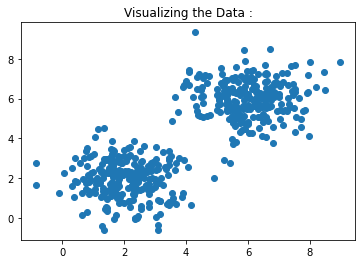

In [436]:
m=X.shape[0]
x1=[]
x2=[]
for i in range(m):
    x1.append(X[i][0])
    x2.append(X[i][1])
x1=np.array(x1)
x2=np.array(x2)
plt.scatter(x1,x2)

plt.title("Visualizing the Data :")
plt.show()

In [437]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.3)
layer_dims=[2,8,1]
x_train=x_train.T
y_train=y_train.reshape(1,len(y_train))
x_test=x_test.T
y_test=y_test.reshape(1,len(y_test))

In [438]:
def layers(layer_dims):
    params, costs = Model(x_train, y_train, layer_dims, num_iterations = 2500)
    y_pred,cache=forward(x_test, params)
    for i in range(len(y_pred[0])):
        if y_pred[0][i]>0.5:
            y_pred[0][i]=1
        else:
            y_pred[0][i]=0
    print("is the FINAL cost with layer dimensions as ", layer_dims)
    eval_metrics(y_pred,y_test)
    return None

In [439]:
layers([2,1,1])

0.2555018096667095	is the FINAL cost with layer dimensions as  [2, 1, 1]
True postive = 80	False postive = 5	True negative = 65	False negative = 0
Precision = 0.9411764705882353		recall = 1.0		f1_score = 0.9696969696969697		accuracy = 0.9666666666666667


2-Layer network with layer dimensions as [2,1,1]

In [440]:
layers([2,2,1])

0.22154061097257796	is the FINAL cost with layer dimensions as  [2, 2, 1]
True postive = 80	False postive = 4	True negative = 66	False negative = 0
Precision = 0.9523809523809523		recall = 1.0		f1_score = 0.975609756097561		accuracy = 0.9733333333333334


2-Layer network with layer dimensions as [2,2,1]

In [441]:
layers([2,8,1])

0.06247094134327081	is the FINAL cost with layer dimensions as  [2, 8, 1]
True postive = 80	False postive = 0	True negative = 70	False negative = 0
Precision = 1.0		recall = 1.0		f1_score = 1.0		accuracy = 1.0


2-Layer network with layer dimensions as [2,8,1]

In [442]:
layers([2,6,4,1])

0.157251380213952	is the FINAL cost with layer dimensions as  [2, 6, 4, 1]
True postive = 80	False postive = 2	True negative = 68	False negative = 0
Precision = 0.975609756097561		recall = 1.0		f1_score = 0.9876543209876543		accuracy = 0.9866666666666667


3-Layer network with layer dimensions as [2,6,4,1]

In [443]:
layers([2,10,4,1])

0.03610958833385014	is the FINAL cost with layer dimensions as  [2, 10, 4, 1]
True postive = 80	False postive = 0	True negative = 70	False negative = 0
Precision = 1.0		recall = 1.0		f1_score = 1.0		accuracy = 1.0


3-Layer network with layer dimensions as [2,10,4,1]

In [444]:
layers([2,10,6,4,1])

0.010489725620629765	is the FINAL cost with layer dimensions as  [2, 10, 6, 4, 1]
True postive = 80	False postive = 0	True negative = 70	False negative = 0
Precision = 1.0		recall = 1.0		f1_score = 1.0		accuracy = 1.0


4-Layer network with layer dimensions as [2,10,6,4,1]